In [1]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#set in the sys path the folder where the custom modules are. 
sys.path.insert(0, '/nas/rhome/cwalker/Desktop/repositories/SCANAnalysis/SCAN-scripts/')

# 4 inch Time Lag Correlation Analysis at SCAN station 2078 with ALEXI

The Goal of this analysis is to see if there is a time component to the 4 inch soil moisture correlations with ALEXI ESI products. 

In [2]:
from class_driver import Driver
from datasets import SCAN_READ #daily soil moisture data for all scan sites
SCAN_READ

,Date,station,SMN-2.0in,SMN-4.0in,SMN-8.0in,SMN-20.0in,SMN-40.0in,SMS-2.0in,SMS-4.0in,SMS-8.0in,...,STV-2.0in,STV-4.0in,STV-8.0in,STV-20.0in,STV-40.0in,STX-2.0in,STX-4.0in,STX-8.0in,STX-20.0in,STX-40.0in
0,4/24/02,2057:AL:SCAN,14.2,11.9,15.9,NaN,34.9,14.7,12.7,16.6,...,68.660,68.150,65.705,63.988,60.980,76.10,73.58,67.64,64.22,60.98
1,4/25/02,2057:AL:SCAN,13.5,11.6,15.4,NaN,34.8,14.5,11.8,16.0,...,66.552,67.168,66.102,64.302,61.032,70.88,70.16,67.46,64.40,61.16
2,4/26/02,2057:AL:SCAN,13.1,11.3,15.3,33.7,34.6,13.5,11.6,15.4,...,58.370,59.870,62.142,63.575,61.160,60.26,62.78,65.30,64.22,61.16
3,4/27/02,2057:AL:SCAN,13.1,11.4,15.0,NaN,34.5,13.2,11.5,15.5,...,62.510,62.232,61.025,62.008,61.018,69.80,67.64,63.32,62.60,61.16
4,4/28/02,2057:AL:SCAN,13.3,11.3,14.4,NaN,34.4,13.5,11.5,15.0,...,68.180,67.408,64.198,62.308,60.740,73.22,71.24,66.20,62.78,60.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79218,10/12/19,2182:AL:SCAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79219,3/28/20,2182:AL:SCAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79220,5/31/20,2182:AL:SCAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79221,9/21/19,2176:AL:SCAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In the following code, I will generate a clean dataframe of 1 week soil moisture data for all SCAN sites. The code comes from a custom, object oriented, modular set of programs in the [SCAN-scripts](https://github.com/Corey4005/SCANAnalysis/tree/main/SCAN-scripts) folder which was designed to effeciently process SCAN data at scale. 

In [3]:
#instantiate a driver object with data
obj = Driver(SCAN_READ)

#calculate the soil moisture mean by month dataframe
obj.mean_soil_moisture_by_month()

#get the standard deviation by month dataframe
obj.standard_deviation_by_month()

#create a column for months in the stations dataframe
obj.get_month_from_dates()

#merge stdev, mean and stations dataframe together
obj.merge_station_stdev_mean()

#calculate the z_scores for each of the observations in the merged dataframe
obj.z_score()

#calculate the data quality based on z_score
obj.quality_z_score(std=3.5)

#clean the data and remove data that is outside the 3.5 standard deviation limit
obj.clean_data()

#resample the SMS data and return 1w and store in resample class
obj.soil_moisture_one_week_resample()

#append the soils to SMS dataframes
obj.create_1w_soil_columns()

#create a storage object for each offset dataframe
storage = {}

#create a list of offsets
days = list(range(-30,30))



Calculating Monthly Mean for 2057:AL:SCAN
Calculating Monthly Mean for 2078:AL:SCAN
Calculating Monthly Mean for 2177:AL:SCAN
Calculating Monthly Mean for 2113:AL:SCAN
Calculating Monthly Mean for 2174:AL:SCAN
Calculating Monthly Mean for 2055:AL:SCAN
Calculating Monthly Mean for 2173:AL:SCAN
Calculating Monthly Mean for 2180:AL:SCAN
Calculating Monthly Mean for 2114:AL:SCAN
Calculating Monthly Mean for 2178:AL:SCAN
Calculating Monthly Mean for 2181:AL:SCAN
Calculating Monthly Mean for 2182:AL:SCAN
Calculating Monthly Mean for 2176:AL:SCAN
Calculating Monthly Mean for 2056:AL:SCAN
Calculating Monthly Mean for 2179:AL:SCAN
Calculating Monthly Mean for 2115:AL:SCAN
Calculating Monthly Mean for 2175:AL:SCAN
Calculating Monthly Mean for 2053:AL:SCAN


Done!


Calculating Monthly Standard Deviation for 2057:AL:SCAN
Calculating Monthly Standard Deviation for 2078:AL:SCAN
Calculating Monthly Standard Deviation for 2177:AL:SCAN
Calculating Monthly Standard Deviation for 2113:AL:SCAN
Calculat

In [4]:
#create dataframes where you offset soil moisture data from ALEXI 
for i in days: 
    print(i)
    obj.merge_1w_soil_resample_with_ALEXI(dayOffset=i)
    df = obj.merge1wALEXI
    storage[i] = df #storing each new dataframe into the storage object (dictionary of dataframes)
    print('completed {}'.format(i))

-30
merging 1 week ALEXI dataframe with 1 week soil moisture data at a -30 day offset
stored merge in self.merge1wALEXI object
completed -30
-29
merging 1 week ALEXI dataframe with 1 week soil moisture data at a -29 day offset
stored merge in self.merge1wALEXI object
completed -29
-28
merging 1 week ALEXI dataframe with 1 week soil moisture data at a -28 day offset
stored merge in self.merge1wALEXI object
completed -28
-27
merging 1 week ALEXI dataframe with 1 week soil moisture data at a -27 day offset
stored merge in self.merge1wALEXI object
completed -27
-26
merging 1 week ALEXI dataframe with 1 week soil moisture data at a -26 day offset
stored merge in self.merge1wALEXI object
completed -26
-25
merging 1 week ALEXI dataframe with 1 week soil moisture data at a -25 day offset
stored merge in self.merge1wALEXI object
completed -25
-24
merging 1 week ALEXI dataframe with 1 week soil moisture data at a -24 day offset
stored merge in self.merge1wALEXI object
completed -24
-23
merging 1

Now, we will go through the storage object, get a dataframe representing an offset, and create a dataframe of correlations with ALEXI. 

In [5]:
dayLag = [] #list to store daylag number
stations = [] #list to store station information
months = [] #list to store month 
counts = [] #list to store number of week observations for each correlation
corrs = [] #list to store correlation

for i in storage:
    df = storage.get(i)
    for j in df['station'].unique():
        stationFrame = df[df['station']==j]
        stationFrame.set_index('Date', inplace=True)
        for m in stationFrame.index.month.unique():
            monthframe=stationFrame[stationFrame.index.month==m]
            dayLag.append(i)
            stations.append(j)
            months.append(m)
            corrs.append(monthframe.corr()['ESI']['SMS-4.0in'])
            counts.append(monthframe.count()['SMS-4.0in'])
            


In [6]:
finalFrame = pd.DataFrame() #create empty dataframe
finalFrame['Daylag']=dayLag #column for daylag
finalFrame['station']=stations #column for station
finalFrame['months']=months #column for month
finalFrame['count']=counts #column for observations
finalFrame['corr']=corrs #column for correlation

In [7]:
finalFrame

,Daylag,station,months,count,corr
0,-30,2053:AL:SCAN,3,62,-0.152317
1,-30,2053:AL:SCAN,4,84,0.319145
2,-30,2053:AL:SCAN,5,56,0.213455
3,-30,2053:AL:SCAN,6,38,0.302644
4,-30,2053:AL:SCAN,7,36,-0.228401
...,...,...,...,...,...
12955,29,2182:AL:SCAN,11,29,0.023983
12956,29,2182:AL:SCAN,12,33,-0.176767
12957,29,2182:AL:SCAN,1,36,-0.200511
12958,29,2182:AL:SCAN,2,28,0.167116


Now we will just get month 10 at station 2078 and look at how correlations compare with daylag

In [8]:
df = finalFrame[finalFrame['station']=='2078:AL:SCAN']
month10 = df[df['months']==10]
month10

,Daylag,station,months,count,corr
48,-30,2078:AL:SCAN,10,74,0.436096
265,-29,2078:AL:SCAN,10,73,0.463108
481,-28,2078:AL:SCAN,10,73,0.498136
697,-27,2078:AL:SCAN,10,73,0.499004
913,-26,2078:AL:SCAN,10,74,0.498110
1129,-25,2078:AL:SCAN,10,73,0.498552
1345,-24,2078:AL:SCAN,10,72,0.495048
1561,-23,2078:AL:SCAN,10,71,0.486228
1777,-22,2078:AL:SCAN,10,71,0.477459
1993,-21,2078:AL:SCAN,10,72,0.454533


Text(0.5, 1.0, '2078:AL:SCAN SMS-4.0in Day Lag Correlation with ALEXI')

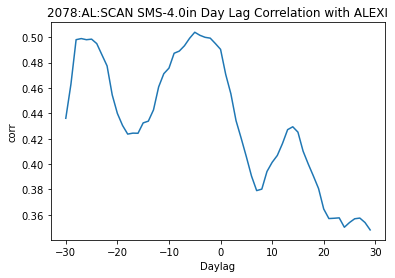

In [9]:
g = sns.lineplot(x='Daylag', y='corr', data=month10)
g.set_title('{} SMS-4.0in Day Lag Correlation with ALEXI'.format(month10['station'].unique().item()))

The graph shows that when soil moisture from SCAN at 2078 is offset from ALEXI at 5 days, you get a 8% increase in correlation from the standard, where they are lined up equally. 

Now, we will consider station 2078 correlations regardless of month. 

In [10]:
dayLag = [] #list to store daylag number
stations = [] #list to store station information
months = [] #list to store month 
counts = [] #list to store number of week observations for each correlation
corrs = [] #list to store correlation

for i in storage:
    df = storage.get(i)
    for j in df['station'].unique():
        stationFrame = df[df['station']==j]
        stationFrame.set_index('Date', inplace=True)
        dayLag.append(i)
        stations.append(j)
        corrs.append(stationFrame.corr()['ESI']['SMS-4.0in'])
        counts.append(stationFrame.count()['SMS-4.0in'])

finalFrame = pd.DataFrame() #create empty dataframe
finalFrame['Daylag']=dayLag #column for daylag
finalFrame['station']=stations #column for station
finalFrame['count']=counts #column for observations
finalFrame['corr']=corrs #column for correlation

Text(0.5, 1.0, '2078:AL:SCAN SMS-4.0in Day Lag Correlation with ALEXI')

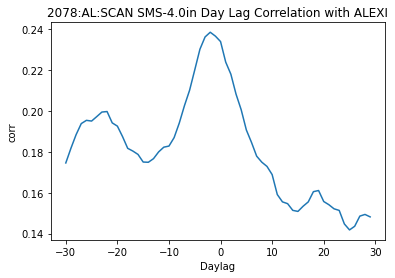

In [11]:
AL2078 = finalFrame[finalFrame['station']=='2078:AL:SCAN']
g = sns.lineplot(x='Daylag', y='corr', data=AL2078)
g.set_title('{} SMS-4.0in Day Lag Correlation with ALEXI'.format(AL2078['station'].unique().item()))

In [12]:
AL2078[AL2078['Daylag']==0]

,Daylag,station,count,corr
544,0,2078:AL:SCAN,680,0.234044


In [13]:
AL2078[AL2078['Daylag']==-4]

,Daylag,station,count,corr
472,-4,2078:AL:SCAN,683,0.230282


In [14]:
dayLag = [] #list to store daylag number
stations = [] #list to store station information
months = [] #list to store month 
counts = [] #list to store number of week observations for each correlation
corrs = [] #list to store correlation

for i in storage:
    df = storage.get(i)
    for j in df['station'].unique():
        stationFrame = df[df['station']==j]
        stationFrame.set_index('Date', inplace=True)
        for m in stationFrame.index.month.unique():
            monthframe=stationFrame[stationFrame.index.month==m]
            dayLag.append(i)
            stations.append(j)
            months.append(m)
            corrs.append(monthframe.corr()['ESI']['SMS-4.0in'])
            counts.append(monthframe.count()['SMS-4.0in'])
            
finalFrame = pd.DataFrame() #create empty dataframe
finalFrame['Daylag']=dayLag #column for daylag
finalFrame['station']=stations #column for station
finalFrame['months']=months #column for month
finalFrame['count']=counts #column for observations
finalFrame['corr']=corrs #column for correlation

In [15]:
AL2078 = finalFrame[finalFrame['station']=='2078:AL:SCAN']

In [16]:
five = AL2078[AL2078['Daylag']==-5]
zero = AL2078[AL2078['Daylag']==0]

<AxesSubplot:xlabel='months', ylabel='corr'>

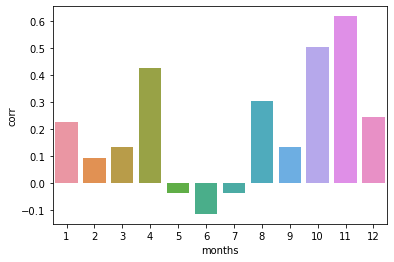

In [17]:
sns.barplot(x='months', y='corr', data=five)

<AxesSubplot:xlabel='months', ylabel='corr'>

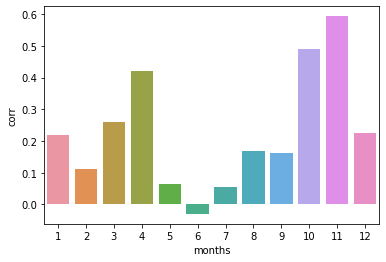

In [18]:
sns.barplot(x='months', y='corr', data=zero)

In [19]:
five.rename(columns={'corr':'-5corr'}, inplace=True)

In [20]:
zero.rename(columns={'corr':'0corr'}, inplace=True)

In [21]:
merge = zero.merge(five, on='months')
merge = merge[['station_x', 'months', '0corr', '-5corr']]

In [22]:
merge['difference']=merge['-5corr']-merge['0corr']

In [23]:
df = pd.melt(merge, id_vars="months", var_name="type", value_name="correlation")

In [24]:
df = df[12:]

In [25]:
df

,months,type,correlation
12,8,0corr,0.16803
13,9,0corr,0.162389
14,10,0corr,0.490509
15,11,0corr,0.593433
16,12,0corr,0.224909
17,1,0corr,0.217594
18,2,0corr,0.110315
19,3,0corr,0.259435
20,4,0corr,0.420577
21,5,0corr,0.063139


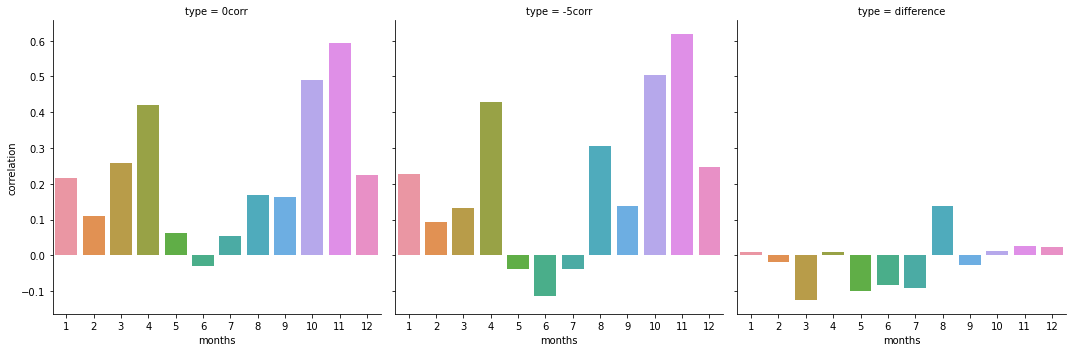

In [26]:
sns.factorplot("months", "correlation", col="type", data=df, kind="bar")

In [27]:
sns.set(font_scale=2)

Text(0.5, 0.98, 'Seasonal Daylag Correlations by Station')

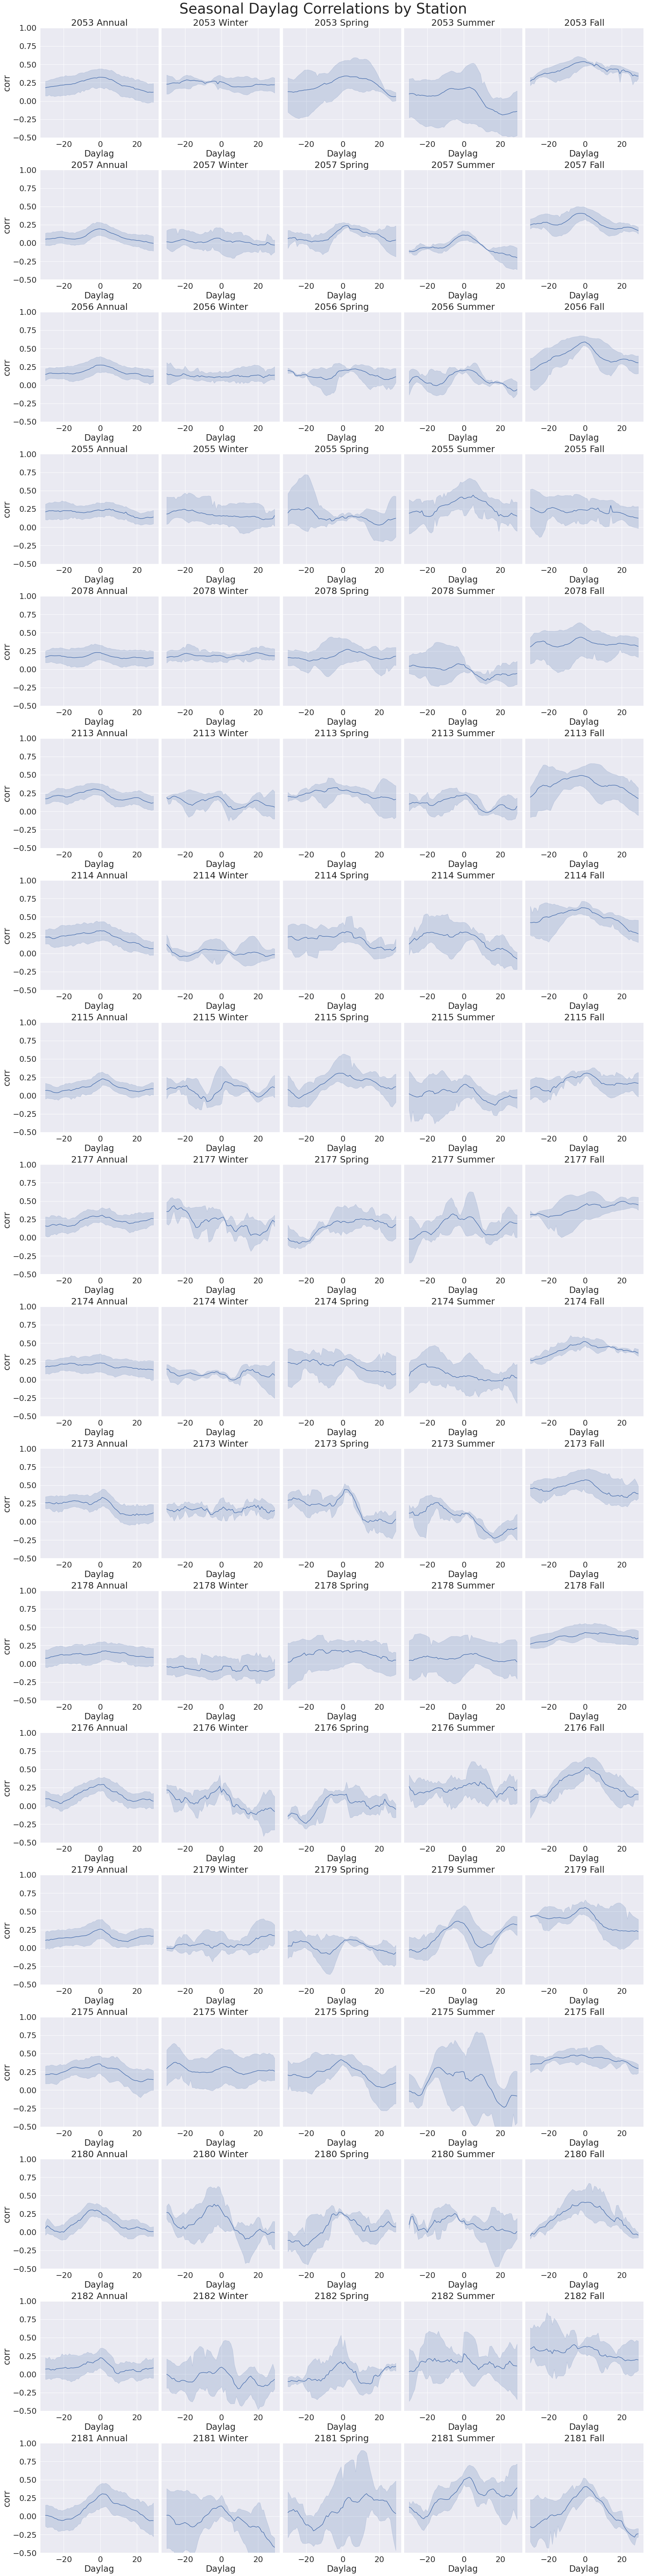

In [28]:
#plot station daylag correlations by season 
fig, axes = plt.subplots(18,5, figsize=(25, 100), constrained_layout=True, sharey=True)

for i, station in enumerate(finalFrame['station'].unique()):
    DJF = finalFrame[(finalFrame['months']==12)|(finalFrame['months']==1)|(finalFrame['months']==2)]
    MAM = finalFrame[(finalFrame['months']==3)|(finalFrame['months']==4)|(finalFrame['months']==5)]
    JJA = finalFrame[(finalFrame['months']==6)|(finalFrame['months']==7)|(finalFrame['months']==8)]
    SON = finalFrame[(finalFrame['months']==9)|(finalFrame['months']==10)|(finalFrame['months']==11)]
    stationframeALL = finalFrame[finalFrame['station']==station]
    stationframeDJF = DJF[DJF['station']==station]
    stationframeMAM = MAM[MAM['station']==station]
    stationframeJJA = JJA[JJA['station']==station]
    stationframeSON = SON[SON['station']==station]
    a = sns.lineplot(x='Daylag', y='corr', data=stationframeALL, ax=axes[i, 0])
    g = sns.lineplot(x='Daylag', y='corr', data=stationframeDJF, ax=axes[i, 1])
    g2 = sns.lineplot(x='Daylag', y='corr', data=stationframeMAM, ax=axes[i, 2])
    g3 = sns.lineplot(x='Daylag', y='corr', data=stationframeJJA, ax=axes[i, 3])
    g4 = sns.lineplot(x='Daylag', y='corr', data=stationframeSON, ax=axes[i, 4])
    a.set_title('{} Annual'.format(station[0:4]), fontsize=25)
    g.set_title('{} Winter'.format(station[0:4]), fontsize=25)
    g2.set_title('{} Spring'.format(station[0:4]), fontsize=25)
    g3.set_title('{} Summer'.format(station[0:4]), fontsize=25)
    g4.set_title('{} Fall'.format(station[0:4]), fontsize=25)
    axes[i, 0].set(ylim=(-0.50, 1.0))
    
fig.suptitle('Seasonal Daylag Correlations by Station', fontsize=40)

Text(0.5, 0.98, 'Seasonal Daylag Correlations ALL Stations')

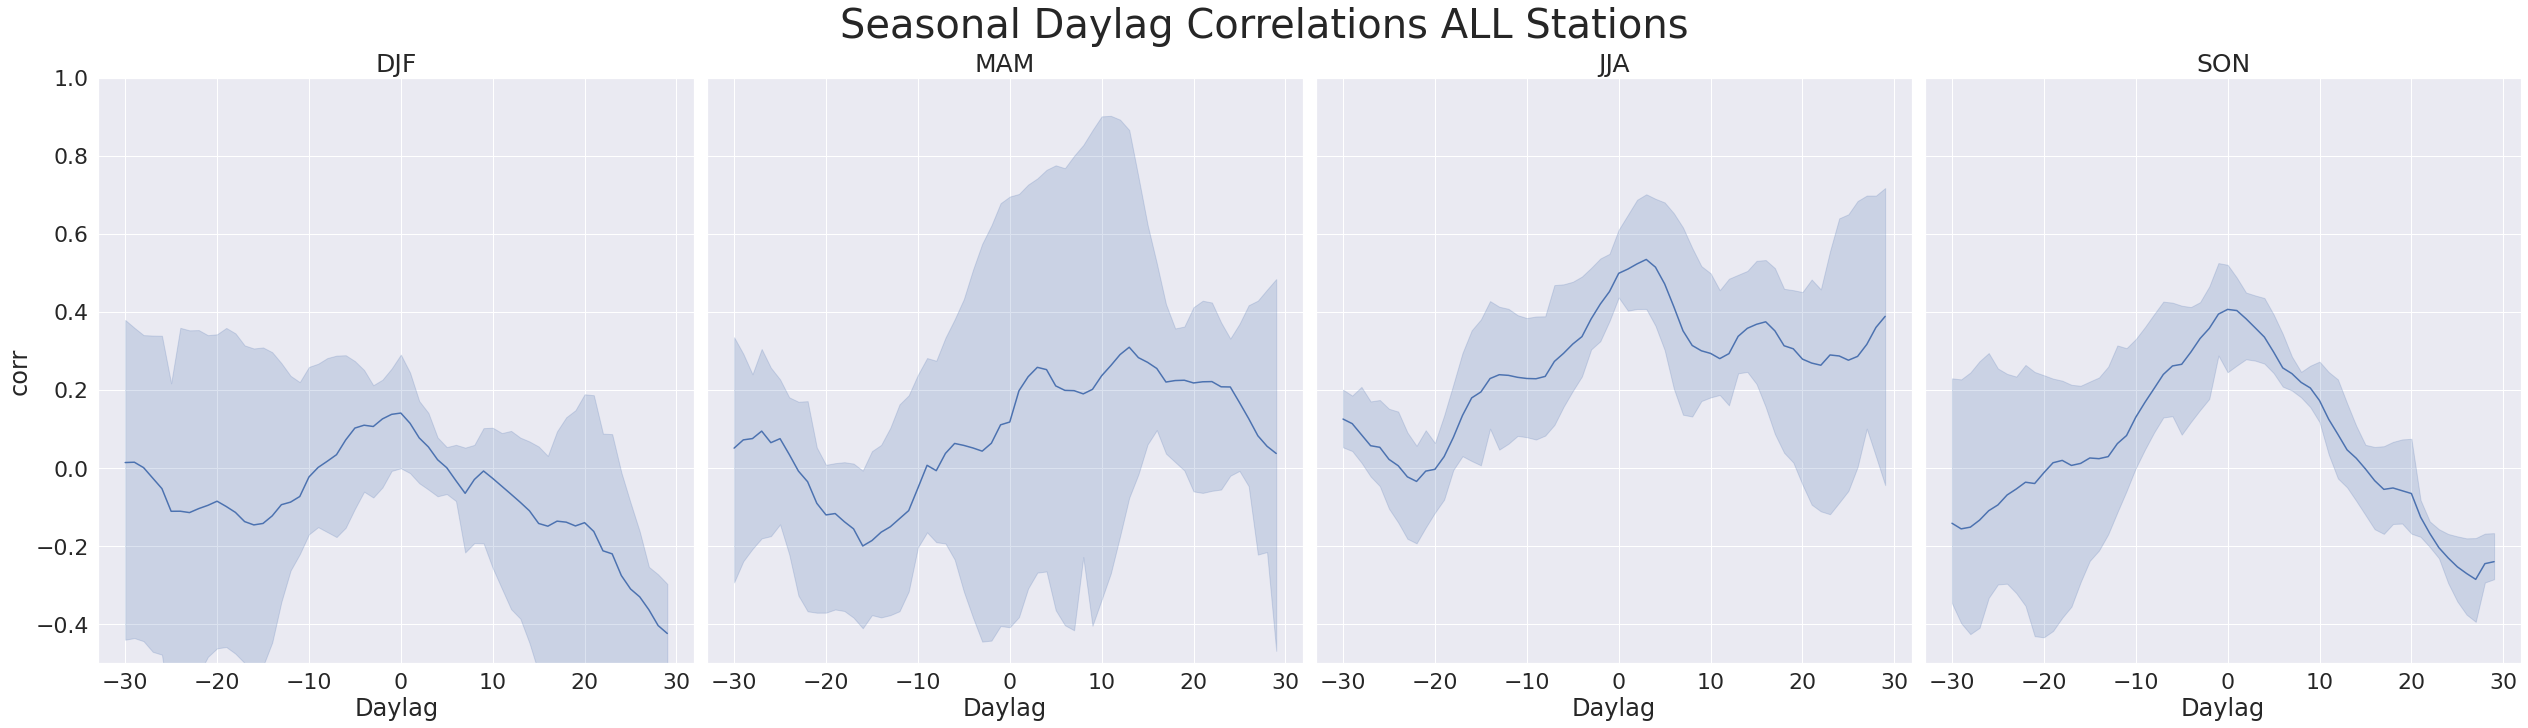

In [39]:
#plot station daylag correlations by season combined
fig, axes = plt.subplots(1,4, figsize=(35,10), constrained_layout=True, sharey=True)
axis = axes.flatten()

DJF = finalFrame[(finalFrame['months']==12)|(finalFrame['months']==1)|(finalFrame['months']==2)]
MAM = finalFrame[(finalFrame['months']==3)|(finalFrame['months']==4)|(finalFrame['months']==5)]
JJA = finalFrame[(finalFrame['months']==6)|(finalFrame['months']==7)|(finalFrame['months']==8)]
SON = finalFrame[(finalFrame['months']==9)|(finalFrame['months']==10)|(finalFrame['months']==11)]
g = sns.lineplot(x='Daylag', y='corr', data=stationframeDJF, ax=axis[0])
g2 = sns.lineplot(x='Daylag', y='corr', data=stationframeMAM, ax=axis[1])
g3 = sns.lineplot(x='Daylag', y='corr', data=stationframeJJA, ax=axis[2])
g4 = sns.lineplot(x='Daylag', y='corr', data=stationframeSON, ax=axis[3])
g.set_title('DJF', fontsize=25)
g2.set_title('MAM', fontsize=25)
g3.set_title('JJA', fontsize=25)
g4.set_title('SON', fontsize=25)
axes[0].set(ylim=(-0.50, 1.0))
    
fig.suptitle('Seasonal Daylag Correlations ALL Stations',fontsize=40)